# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [2]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for one observation of a single Poisson random variable is

$$\ell(\lambda; y) = -\Bigg(   y\cdot \ln(\lambda) - \lambda - \ln(y) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with the same parameter $\lambda$, is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with a *different* parameter $\lambda$ for each one, is

$$\ell(\boldsymbol{\lambda}; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda_i) - \lambda_i - \ln(y_i!) \Bigg)$$

See the difference?

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood. Use numpy functions so that you don't need to use loops. Also, note that the $\sum_{i} \ln(y!)$ term does not affect the location of the maximum because it does not change with $\lambda$, and so you can (and should) omit the $ \ln(y!)$ in your function.

Your code should work for two cases:

First, it should work with a scalar $\lambda$ and a vector $y$. Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

Second, it should work with a vector $\lambda$ and a vector $y$, if they have the same length. (This is the last likelihood function described above.) Test your function by calling it with `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`. In this second case, the first $\lambda$ should be used to evaluate the first $y$, the second $\lambda$ should be used to evaluat the second $y$, and so on. ***YOU SHOULD NOT USE ANY LOOPS - BOTH CASES SHOULD WORK IF YOU CODE IT IN THE SIMPLEST WAY BECAUSE OF HOW NUMPY WORKS.**

**Answer the following below in markdown:** What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

If you set an element of lam to 0, or a negative number, you would get an undefined number when doing np.log(0) or np.log(-1) (or any other negative number). Setting an element of lam to 0 or lower goes against the domain of log (> 0).

In [3]:
def poissonNegLogLikelihood(lam, y):
    neg_log_lik = -1 * np.sum((y * np.log(lam)) - lam)
    return neg_log_lik


# should work for vecYscalL
lam = 1.3
y = np.array([2, 1, 0, 0])

scalarLam = poissonNegLogLikelihood(lam, y)

# should work for vecYvecL
lam = np.array([1, 0.5, 1, 3])
y = np.array([2, 1, 0, 0])

vectorLam = poissonNegLogLikelihood(lam, y)

print("With a scalar lambda, the answer is: ", scalarLam)
print("With a vector lambda, the answer is: ", vectorLam)

With a scalar lambda, the answer is:  4.412907206597527
With a vector lambda, the answer is:  6.193147180559945


---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$. Hint: Numpy implements the exponential using `np.exp`.

Hint: You should use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [4]:
def poissonRegressionNegLogLikelihood(b, X, y):
    # Enter the expression for lambda as shown above!
    lam = np.exp(X @ b)
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam=lam, y=y)
    return neg_log_lik


b = np.array([1, 2])
X = np.array([[1, 2, 3], [2, 3, 1]]).T
y = np.array([0, 2, 10])

result = poissonRegressionNegLogLikelihood(b, X, y)

print("The Negative Log Likelihood is: ", result)

The Negative Log Likelihood is:  3211.7843052468816


### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) We applied the exponential function to make sure that lambda is always positive. Lambda represents the expected count (predicted Y) so it has to be non-negative for it to make sense (be a valid prediction).

b) If we only passed $\lambda = \mathbf{X}\beta$, then the value of $\lambda$ would be negative. This is a mathematical error and will not result in an accurate prediction.


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [5]:
def modelPrediction(b,X):
    yhat = np.exp(X@b)
    return yhat

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T

result = modelPrediction(b=b,X=X)

print("Y-hat is ",result)

Y-hat is  [ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [6]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.zeros(shape=X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(fun=poissonRegressionNegLogLikelihood, x0=beta_start, args=(X, y), method="Powell")
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.

X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])

result=fitModel(X=X,y=y)

print("Maximum Likelihood Estimate (for betas) is ", result)



Maximum Likelihood Estimate (for betas) is  [ 0.94819629 -0.52913312]


### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

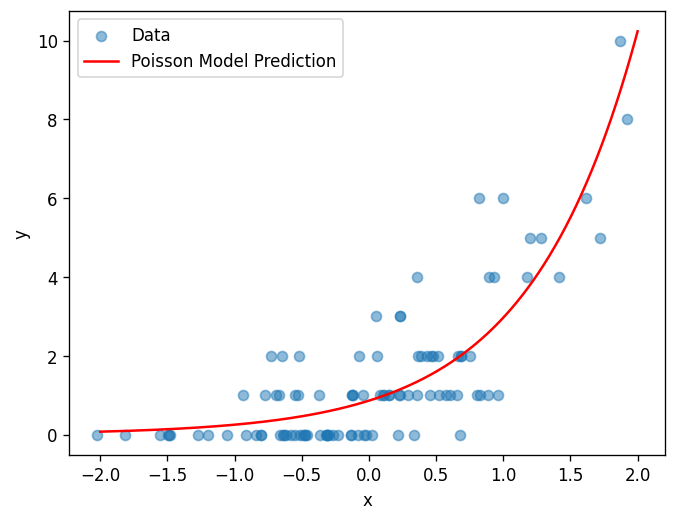

In [7]:
# Loading in the data.  
df = pd.DataFrame(pd.read_csv("poisson_regression_data.csv"))

fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 

ax.scatter(df["x"], df["y"], label="Data", alpha=0.5)

# Fit the model.  Use your functions.  
x = df.x.values 
X = np.column_stack((np.ones(len(x)), x))
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.column_stack((np.ones(len(newx)), newx))

# Make predictions on the new data
y_predicted= modelPrediction(b=betas, X=newX)

#Finally, plot the predictions on the same axis and color the predictions red
ax.plot(newx, y_predicted, color='red', label='Poisson Model Prediction')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


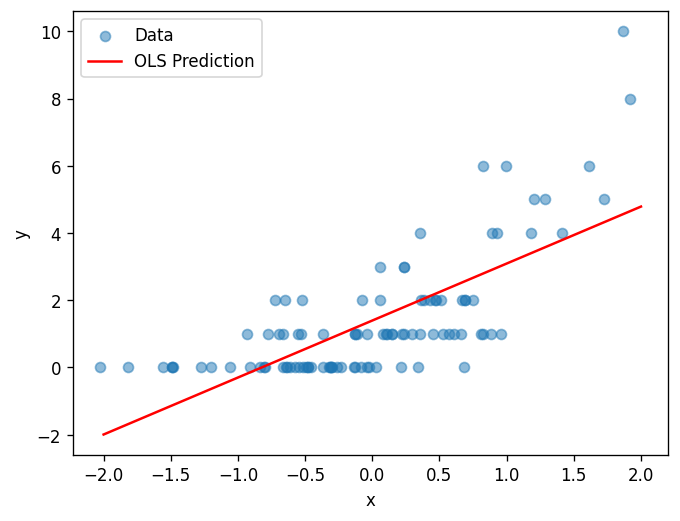

Estimated betas for OLS are  [1.39498037 1.69532321]


In [8]:
# Hint: Very similar to the previous assignment
# Read in the data
df = pd.DataFrame(pd.read_csv("poisson_regression_data.csv"))

x=df.x.values
y=df.y.values
X=np.column_stack((np.ones(len(x)),x))

# fit the model
ols_fit = linear_model.LinearRegression(fit_intercept=False).fit(X,y)
betas_ols = ols_fit.coef_

# Make predictions over the range -2 to 2
newx = np.linspace(-2,2,1001)
newX = np.column_stack((np.ones(len(newx)), newx))

y_predicted_ols= ols_fit.predict(newX)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)

ax.scatter(x, y, label='Data', alpha=0.5) 
ax.plot(newx, y_predicted_ols, color='red', label='OLS Prediction')  

ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.legend() 
plt.show()

print("Estimated betas for OLS are ", betas_ols)

### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

There are 2 major problems with the predictions from linear regression. First, this model is intended to model counts of things, which more often than not means that $y \geq 0$ . This OLS regression model shows predictions for $x = -2.0$ being $y = -2$, which is an inaccurate prediction. OLS regression also assumes that the relationship between $x$ and $y$ is linear, which doesn't seem to be the case here as the Poisson model I wrote is much more accurate.